# Logistic Regression

## February 1, 2021

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
https://medium.com/@kbrook10/day-10-machine-learning-using-logisticregression-with-scikit-learn-99316e6589cd
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [1]:
# import standard libraries
import pandas as pd                                    # data frames  
import numpy as np                                     # matrices 
import matplotlib.pyplot as plt                        # plotting 
import seaborn as sns; sns.set()                       # better plotting
from sklearn.model_selection import train_test_split   # training-vs-testing
from sklearn.linear_model import LinearRegression      # the linear regression model
from sklearn import metrics
%matplotlib inline

In [2]:
# All about Logistic Regression in one article
# https://towardsdatascience.com/logistic-regression-b0af09cdb8ad

## as we did with linear regression, lets start with a synthetic dataset where we already know the answer ...

In [3]:
# first, lets try a synthetic dataset: linear plus noise
# pick "num" random numbers between -10 and 10

rng = np.random.RandomState(1)          # initialise random number generator "rng"
num = 15                                # number of data points
min, max = -10,10                       # range of dependent variable (note syntax)

x1 = min + (max-min)*rng.rand(num)      # vector of random numbers uniform between min and max.

np.set_printoptions(precision=3)        # avoid nuisance of too many digits printing
print(x1)

[-1.66   4.406 -9.998 -3.953 -7.065 -8.153 -6.275 -3.089 -2.065  0.776
 -1.616  3.704 -5.911  7.562 -9.452]


In [4]:
# convert this to a probability via the inverse-logit (sigmoid) function

z = -0.1 + 0.5*x1                    # linear combination with a bias
prob = 1/(1+np.exp(-z))         # pass through an inv-logit function

# note: x1 is a vector, so z and prob are also!
print("z: ",z)
print("prob: ",prob)

z:  [-0.93   2.103 -5.099 -2.077 -3.632 -4.177 -3.237 -1.644 -1.132  0.288
 -0.908  1.752 -3.055  3.681 -4.826]
prob:  [0.283 0.891 0.006 0.111 0.026 0.015 0.038 0.162 0.244 0.572 0.287 0.852
 0.045 0.975 0.008]


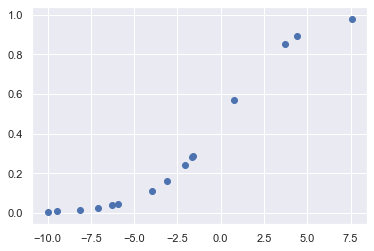

In [5]:
# or better yet
plt.scatter(x1,prob)

In [6]:
# for a given vector of probabilities, produce a vector of events (0/1) with those probability
# Binomial distribution: "n" independent trials, each with probability "prob"
# here "n" = 1 (also called "Bernoulli trial")

prob =[0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,1,1]
# first 3 are    prob = 0 (guaranteed fail)
# next 7 are     prob = 0.5 (coin toss)
# last 3 are     prob = 1 (guaranteed success)
y = np.random.binomial(1, prob)
print(y)

[0 0 0 1 1 0 1 0 0 1 1 1 1]


## bring it all together

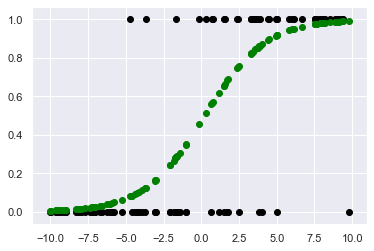

In [7]:
rng = np.random.RandomState(1)          # initialise random number generator "rng"
num = 100                                # number of data points
min, max = -10,10                       # range of dependent variable (note syntax)

x1 = min + (max-min)*rng.rand(num)      # vector of random numbers uniform between min and max.

z = -0.1 + 0.5*x1                    # linear combination with a bias
prob = 1/(1+np.exp(-z))         # pass through an inv-logit function
y = np.random.binomial(1, prob)
plt.scatter(x1,y, color="black")
plt.scatter(x1,prob, color='green')

In [8]:
# 50-50 occurs when z = 0; if z = -0.1 + 0.5*x1, then x1 = 0.2
# when z = 2, ~90% chance of success: 
1/(1+np.exp(-2)) 

0.8807970779778823

In [9]:
# when z = -2, ~10% chance of success:
1/(1+np.exp(+2)) 

0.11920292202211755

since z = mx+b, 
* 50% when z=0  =>  x = -b/m
* 88% when z=2  =>  x = (2-b)/m = -b/m + 2/m
* 12% when z=-2 =>  x = (-2-b)/m = -b/m - 2/m

so break-even midpoint at -b/m and "width" ~ 4/m

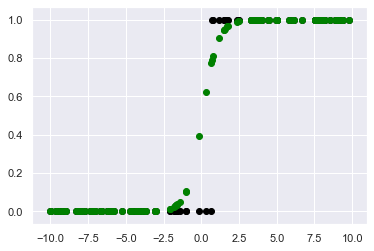

In [10]:
#test this by making m larger, which makes crossover narrower

rng = np.random.RandomState(1)          # initialise random number generator "rng"
num = 100                                # number of data points
min, max = -10,10                       # range of dependent variable (note syntax)

x1 = min + (max-min)*rng.rand(num)      # vector of random numbers uniform between min and max.

z = -0.1 + 2*x1                    # linear combination with a bias
prob = 1/(1+np.exp(-z))         # pass through an inv-logit function
y = np.random.binomial(1, prob)
plt.scatter(x1,y, color="black")
plt.scatter(x1,prob, color='green')

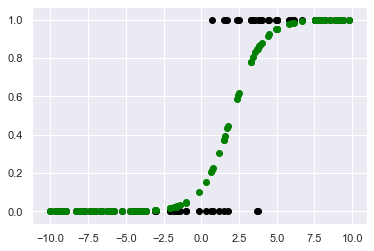

In [11]:
# better parameterization: z = m*(x1 - xmidpoint) 
# 50-50 at xmidpoint
# width ~ 4/m

rng = np.random.RandomState(1)          # initialise random number generator "rng"
num = 100                                # number of data points
min, max = -10,10                       # range of dependent variable (note syntax)

x1 = min + (max-min)*rng.rand(num)      # vector of random numbers uniform between min and max.

z = 1*(x1 - 2)                   # linear combination with a bias

prob = 1/(1+np.exp(-z))         # pass through an inv-logit function
y = np.random.binomial(1, prob)
plt.scatter(x1,y, color="black")
plt.scatter(x1,prob, color='green')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
X = x1[:,np.newaxis] #  convert from row to column (try without it, error message)
logreg.fit(X,y)  

/Users/drokhsar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver="lbfgs")  # fix the error message by specifying recommended solver
logreg.fit(X,y)  # embed the conversion from row to column inside

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
print(logreg.coef_, logreg.intercept_)

[[1.088]] [-1.824]


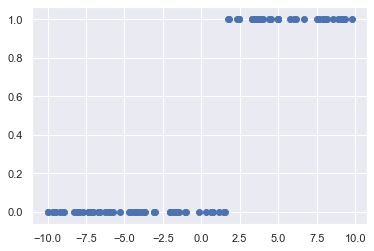

In [15]:
# use as a classifier by thresholding: 
# if fitted y is >0.5, predict as "1"; if fitted y is <0.5, predict as "0"

y_pred = logreg.predict(X)
plt.scatter(X,y_pred)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[56,  3],
       [ 3, 38]])

In [17]:
print("Accuracy of logistic regression classifier:", logreg.score(X,y))

Accuracy of logistic regression classifier: 0.94


In [115]:
# accuracy = (# correct)/(# total) = (60+31)/100

# try out some different parameters (the slope "m")

In [ ]:
# note that scatterplot of true vs. predicted is not particularly useful



In [18]:
## precision: tp/(tp+fp) = ability of classifier to not label a sample positive if it is negative
## recall: tp/(tp+fn) = ability to find all positive samples

from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.93      0.93      0.93        41

   micro avg       0.94      0.94      0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



## Lets go back to the digits and use a generalization of LogisticRegression to try to classify the images.

(From Towards Data Science: Logistic Regression using Python (scikit-learn) page by Michael Galarnyk)

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

In [20]:
# 1797 handwritten digits, 8x8 thumbnails
print("Image Data Shape", digits.data.shape)

Image Data Shape (1797, 64)


In [21]:
# each of the thumbnails are labeled (0-9)
# this is what we would like to predict: it is the "target"

print("Label Data Shape", digits.target.shape)

Label Data Shape (1797,)


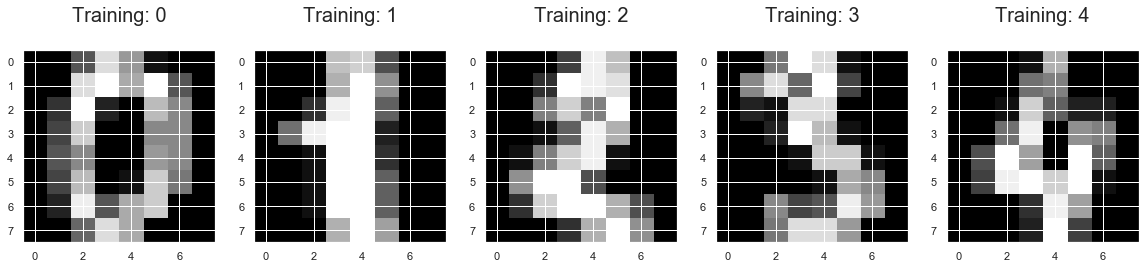

In [22]:
# remember what the data looks like
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state=0)

In [24]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

# make an instance of the model. Now we want a logistic regression that can be true/false for each possible digit
logisticRegr = LogisticRegression(solver="lbfgs", multi_class="auto", max_iter=10000)

# note: I kept getting warnings for non-convergence, and kept bumping up max_iter

In [25]:
# train on trining dataset
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## look at the first five test images

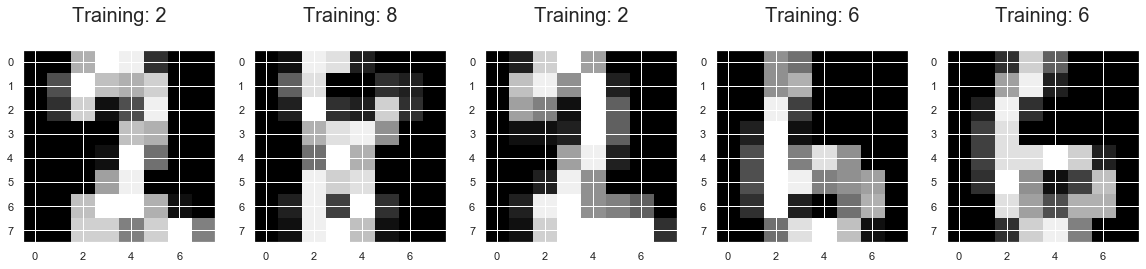

In [26]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [27]:
# predict labels for these images from logistic regression
logisticRegr.predict(X_test[0:5])

array([2, 8, 2, 6, 6])

## what's going on here?

Multinomial logistic regression: do logistic regression to estimate probability for each possible digit vs. not-that-digit (e.g.: "zero" vs not-zero; "one" vs not-one; etc. Classifier takes the largest probability value.

In [28]:
predictions = logisticRegr.predict(X_test)

In [29]:
#accuracy of prediction = correct predictions/total number of data points
score = logisticRegr.score(X_test, y_test)
print(score)

0.9533333333333334


In [30]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


## wow!
most of the values are on the diagonal => predicted = label.  there are scattered "confusions" off-diagonal. Lets look at these


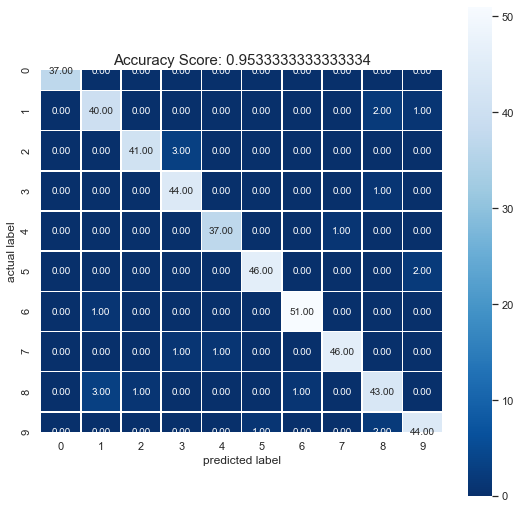

In [31]:
# visualize with seaborn

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt = '.2f', linewidths = 0.5, square = True,
            cmap = 'Blues_r');
plt.ylabel("actual label");
plt.xlabel("predicted label");
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size = 15);


In [159]:
print(y_test)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


In [160]:
print(predictions)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 8 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 6 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 8 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 3 0 4 5 8 3 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


In [162]:
zip(y_test,predictions)

In [167]:
# misclassified
misclassified=[]
for label, predict in zip(y_test, predictions):
    if label != predict:
        print(label, predict)
        misclassified.append(index)
        index +=1

5 9
9 8
7 4
6 1
8 6
8 1
9 5
5 9
8 1
1 8
2 3
2 3
4 7
1 9
1 8
8 2
3 8
8 1
7 3
9 8
2 3
